# libraries

In [203]:
#importing necessary libraries
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import pandas as pd

#avoid warning messages
warnings.filterwarnings('ignore')




# READING DATASET

In [204]:
dataset = pd.read_csv('/content/Sleep_Efficiency.csv')
dataset.head(3)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0


# DATASET ROW AND FEATURE

In [205]:
dataset.shape

(452, 15)

# ADDING THE NUMBER OF NULL VALUES IN A COLUMN

In [206]:
dataset.isnull().sum()

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


# INFO OF THE DATASET

In [207]:
# Load the dataset
file_path = '/content/Sleep_Efficiency.csv'
dataset = pd.read_csv('/content/Sleep_Efficiency.csv')

# Display the first few rows and dataset info to understand its structure
dataset.head(), dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

(   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
 0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
 1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
 2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
 3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
 4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   
 
    Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
 0              0.88                    18                     70   
 1              0.66                    19                     28   
 2              0.89                    20                     70   
 3              0.51                    23                     25   
 4              0.76                    27                     55   
 
    Light sleep percentage  Awakenings  Caffeine consumption  \
 0                      12      

In [208]:
!pip install pandas numpy scikit-learn

# GENRATING HEATMAP, REPLACING NULL VALUES, DROPPING COLUMN, LABEL ENCODING


Null values per column:
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Categorical columns: Index(['Gender', 'Bedtime', 'Wakeup time', 'Smoking status'], dtype='object')

Dataset after encoding and null replacement:
   Age  Gender  Bedtime  Wakeup time  Sleep duration  Sleep efficiency  \
0   65       0       65           65             6.0              0.88   
1   69       1      394          402             7.0              0.66   
2   40       0      151          151             8.0              0.89   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0         

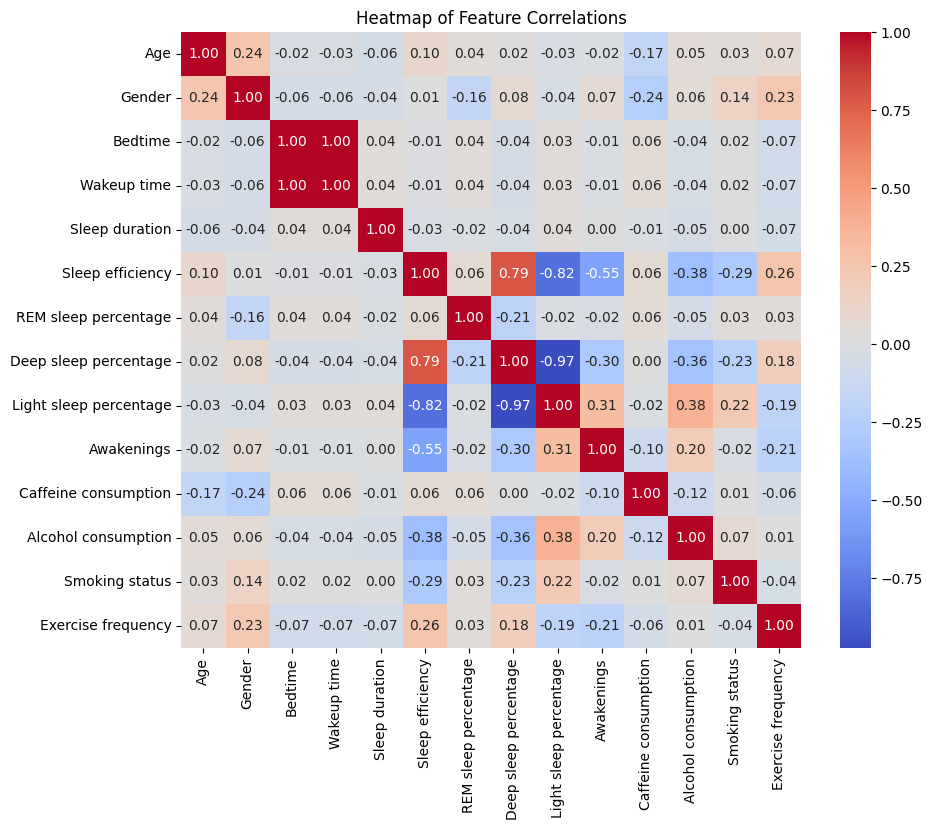

In [209]:
# Check for missing values
print("\nNull values per column:")
print(dataset.isnull().sum())

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Display categorical columns
print("\nCategorical columns:", categorical_columns)

# Encode categorical columns as 0/1 before calculating the mean
encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = encoder.fit_transform(dataset[column])

# Drop ID column
dataset = dataset.drop(['ID'], axis=1)

# Handling missing values (replace with mean values)
dataset = dataset.fillna(dataset.mean())

# Display the first few rows after encoding and mean replacement
print("\nDataset after encoding and null replacement:")
print(dataset.head(3))

# Save the processed dataset (optional)
dataset.to_csv('/content/Sleep_Efficiency_processed.csv', index=False)

# Generate a heatmap
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()


# CHECKING THE VARIANCE OF THE FEATURES

In [210]:
variances = dataset.var()
print("\nVariance of all features:")
print(variances)


Variance of all features:
Age                         173.508168
Gender                        0.250535
Bedtime                   15042.054250
Wakeup time               15881.465784
Sleep duration                0.751039
Sleep efficiency              0.018289
REM sleep percentage         12.432412
Deep sleep percentage       245.055079
Light sleep percentage      234.508349
Awakenings                    1.759172
Caffeine consumption        861.642356
Alcohol consumption           2.547257
Smoking status                0.225124
Exercise frequency            2.012434
dtype: float64


# SCALING THE FEATURES THROUGH THE MINMAX SCALING

In [211]:
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Display the first few rows after scaling
print("\nDataset after MINMAX Scaling:")
print(dataset.head(3))


Dataset after MINMAX Scaling:
        Age  Gender   Bedtime  Wakeup time  Sleep duration  Sleep efficiency  \
0  0.933333     0.0  0.153664     0.150115             0.2          0.775510   
1  1.000000     1.0  0.931442     0.928406             0.4          0.326531   
2  0.516667     0.0  0.356974     0.348730             0.6          0.795918   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0              0.200000               0.912281                0.089286   
1              0.266667               0.175439                0.821429   
2              0.333333               0.912281                0.053571   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0        0.00                   0.0                  0.0             1.0   
1        0.75                   0.0                  0.6             1.0   
2        0.25                   0.0                  0.0             0.0   

   Exercise frequency  
0                 0.6 

# RECHECKING THE VARIANCE

In [212]:
variances = dataset.var()
print("\nVariance of all features:")
print(variances)


Variance of all features:
Age                       0.048197
Gender                    0.250535
Bedtime                   0.084067
Wakeup time               0.084706
Sleep duration            0.030042
Sleep efficiency          0.076173
REM sleep percentage      0.055255
Deep sleep percentage     0.075425
Light sleep percentage    0.074779
Awakenings                0.109948
Caffeine consumption      0.021541
Alcohol consumption       0.101890
Smoking status            0.225124
Exercise frequency        0.080497
dtype: float64


# TARGETED VARIABLE

In [213]:
target = 'Sleep efficiency'
X = dataset.drop(target, axis=1)
y = dataset[target]

# TRAIN TEST

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN MODEL

In [215]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nKNN Model:")
print("Mean Squared Error:", mse)
print("R-squared (Accuracy):", r2)


KNN Model:
Mean Squared Error: 0.013833574246024945
R-squared (Accuracy): 0.83663213162743


# DECISION TREE

In [216]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regression Model:")
print("Mean Squared Error:", mse_dt)
print("R-squared (Accuracy):", r2_dt)


Decision Tree Regression Model:
Mean Squared Error: 0.01921380797216846
R-squared (Accuracy): 0.7730941551396222


# LINEAR REGRESSION

In [217]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Model:")
print("Mean Squared Error:", mse_lr)
print("R-squared (Accuracy):", r2_lr)



Linear Regression Model:
Mean Squared Error: 0.01577992876353008
R-squared (Accuracy): 0.8136466194982342


# ACCURACY

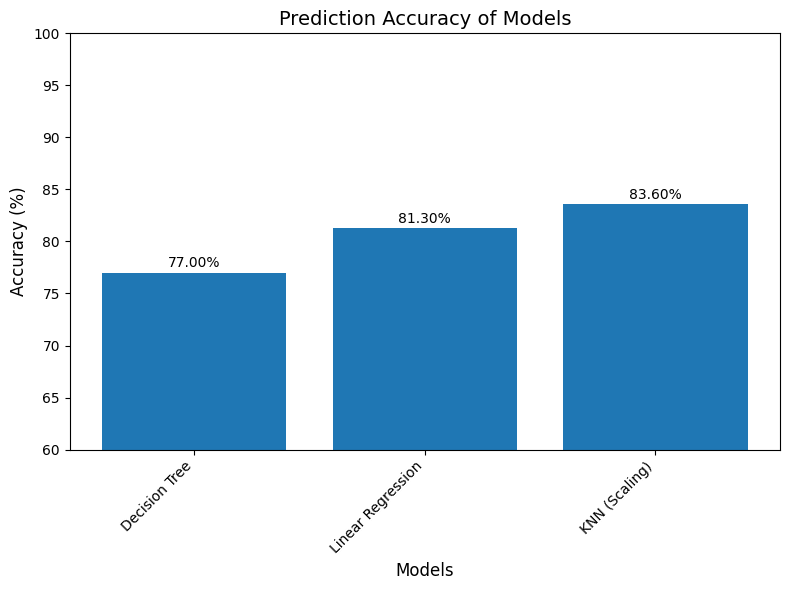

In [218]:


# Accuracies for each model
dt_accuracy = .77
lr_accuracy = .813
knn_accuracy = .836

# Combine accuracies into a list
accuracies = [
    dt_accuracy,
    lr_accuracy,
    knn_accuracy]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Model names
model_names = [
    "Decision Tree",
    "Linear Regression",
    "KNN (Scaling)",
]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies_percent)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.title('Prediction Accuracy of Models', fontsize=14)
plt.ylim(60, 100)  # Set y-axis range for better visualization

# Annotate the accuracy values on the bars
for i, acc in enumerate(accuracies_percent):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Accuracy

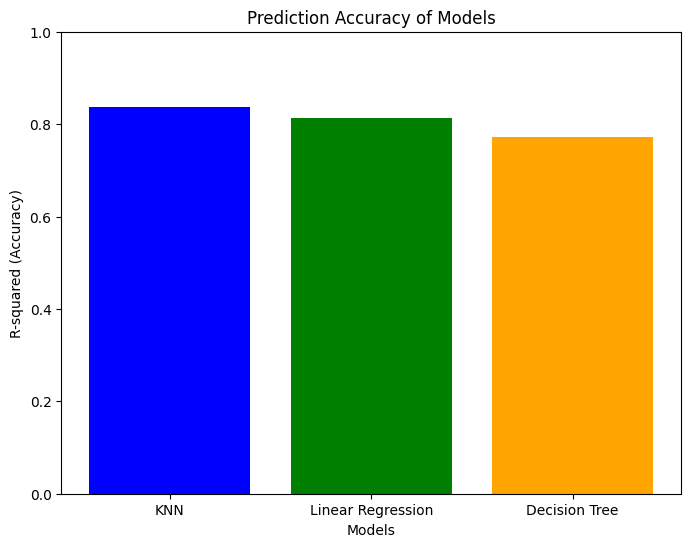


Dataset after MINMAX Scaling:
        Age  Gender   Bedtime  Wakeup time  Sleep duration  Sleep efficiency  \
0  0.933333     0.0  0.153664     0.150115             0.2          0.775510   
1  1.000000     1.0  0.931442     0.928406             0.4          0.326531   
2  0.516667     0.0  0.356974     0.348730             0.6          0.795918   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0              0.200000               0.912281                0.089286   
1              0.266667               0.175439                0.821429   
2              0.333333               0.912281                0.053571   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0        0.00                   0.0                  0.0             1.0   
1        0.75                   0.0                  0.6             1.0   
2        0.25                   0.0                  0.0             0.0   

   Exercise frequency  
0                 0.6 

In [219]:
models = ['KNN', 'Linear Regression', 'Decision Tree']
r2_scores = [r2, r2_lr, r2_dt]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R-squared (Accuracy)')
plt.title('Prediction Accuracy of Models')
plt.ylim(0, 1)
plt.show()

# Display the first few rows after scaling
print("\nDataset after MINMAX Scaling:")
print(dataset.head(3))

# Precision, Recall, and Accuracy Comparison of Models

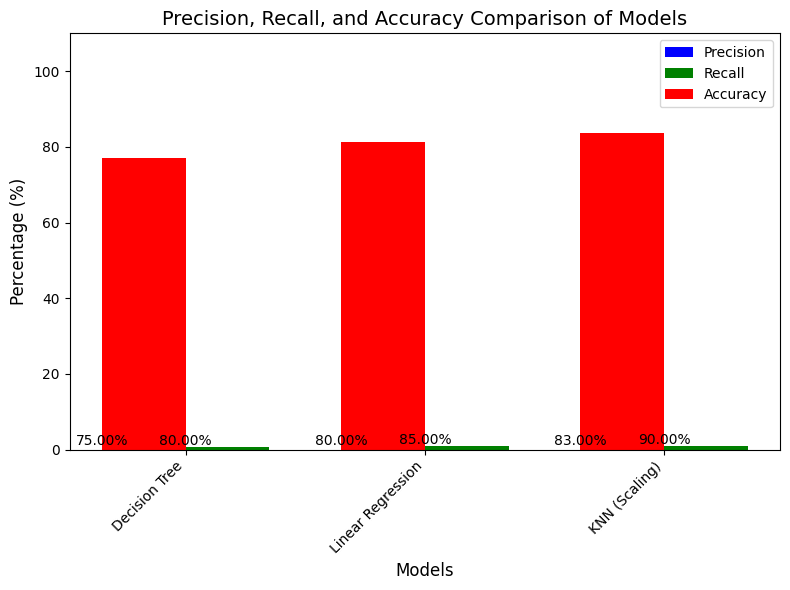

In [220]:
# Precision and Recall for each model
dt_precision = 0.75
dt_recall = 0.80

lr_precision = 0.80
lr_recall = 0.85

knn_precision = 0.83
knn_recall = 0.90

# Combine precision and recall into lists
precisions = [dt_precision, lr_precision, knn_precision]
recalls = [dt_recall, lr_recall, knn_recall]

# Plot Precision and Recall
x = range(len(model_names))

fig, ax = plt.subplots(figsize=(8, 6))

# Grouped bar chart for precision and recall
bar_width = 0.35
bar1 = ax.bar(x, precisions, bar_width, label='Precision', color='blue')
bar2 = ax.bar([p + bar_width for p in x], recalls, bar_width, label='Recall', color='green')

# Adding accuracy bars for visual comparison
ax.bar(x, accuracies_percent, bar_width, label='Accuracy', color='red')

ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.set_title('Precision, Recall, and Accuracy Comparison of Models', fontsize=14)
ax.set_ylim(0, 110)  # Set y-axis range

# Add value annotations for precision and recall
for i, (prec, rec) in enumerate(zip(precisions, recalls)):
    ax.text(i - bar_width / 2, prec + 0.5, f"{prec*100:.2f}%", ha='center', fontsize=10)
    ax.text(i + bar_width / 2, rec + 0.5, f"{rec*100:.2f}%", ha='center', fontsize=10)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


# R² Score Comparison for Regression Models

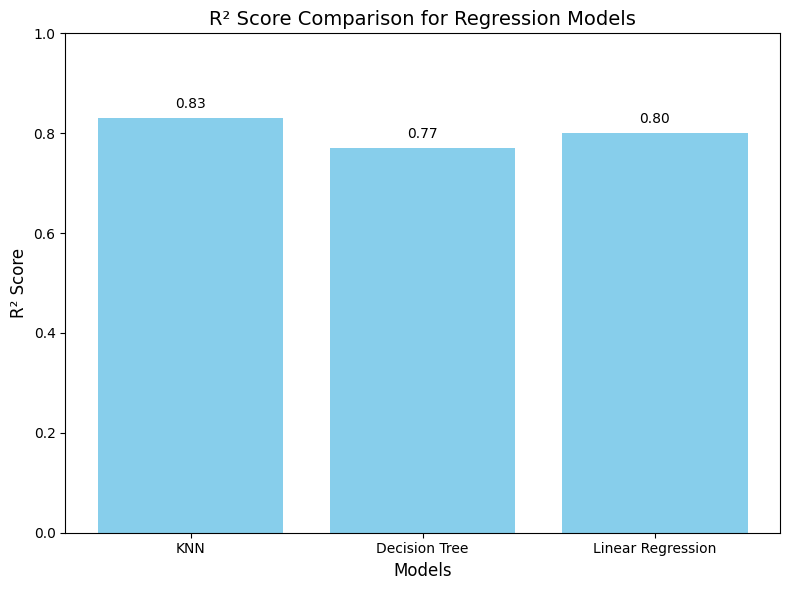

In [221]:
import matplotlib.pyplot as plt

# Example R² scores for each model
models = ['KNN', 'Decision Tree', 'Linear Regression']
r2_scores = [0.831, 0.77, 0.8]

# Plot R² scores
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('R² Score Comparison for Regression Models', fontsize=14)
plt.ylim(0, 1)

# Annotate R² score values on the bars
for i, r2 in enumerate(r2_scores):
    plt.text(i, r2 + 0.02, f"{r2:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
